# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [272]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import requests, io
import PIL
import IPython

In [273]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [274]:
# Read the Mapbox API key
load_dotenv(r"D:\Keys\keys.env")
map_box_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [275]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.set_index("neighbourhood",inplace=True)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [276]:
# Getting the data from the top 10 expensive neighbourhoods
multi_group = to_data.groupby("neighbourhood",).sum()/to_data.groupby("neighbourhood").count()
multi_group.sort_values("average_house_value",ascending=False,inplace=True)
top_10 = multi_group.head(10)
top_10 = top_10.drop(columns=["single_detached_house","apartment_five_storeys_plus","movable_dwelling","semi_detached_house","row_house","duplex","apartment_five_storeys_less","other_house","shelter_costs_owned","shelter_costs_rented"])

In [277]:
# Calculate the mean number of dwelling types units per year
dwelling_py = dwelling_py.groupby("year").sum()/to_data.groupby("year").count()


In [278]:
# Calculate the average monthly shelter costs for owned and rented dwellings
a_data_grp = to_data.groupby("year").sum()/to_data.groupby("year").count()
data_month_owned = a_data_grp.loc[:,"shelter_costs_owned":"shelter_costs_owned"]
data_month_rent = a_data_grp.loc[:,"shelter_costs_rented":"shelter_costs_rented"]

In [279]:
# Mean House Prices 2001 - 2006
multi_group = to_data.groupby("neighbourhood").sum()/to_data.groupby("neighbourhood").count()

# Join the average values with the neighbourhood locations
joined_data_rows = pd.concat(
    [multi_group, df_neighbourhood_locations], axis="columns", join="inner"
).reset_index()

In [280]:
# Create a bar chart per year to show the number of dwelling types
# Bar chart for 2001
to_data_grp = to_data.groupby("year").sum()
data_2001 = to_data_grp.loc[2001,"single_detached_house":"other_house"]
# Bar chart for 2006
data_2006 = to_data_grp.loc[2006,"single_detached_house":"other_house"]
# Bar chart for 2011
data_2011 = to_data_grp.loc[2011,"single_detached_house":"other_house"]
# Bar chart for 2016
data_2016 = to_data_grp.loc[2016,"single_detached_house":"other_house"]

In [281]:
# Calculate the average house value per year
average_house_value = a_data_grp.loc[2001:2016,"average_house_value"]

In [282]:
# Clean Neighbourhood Data
neighbourhood_grp_clean = to_data.drop(columns=["single_detached_house","apartment_five_storeys_plus","movable_dwelling","semi_detached_house","row_house","duplex","apartment_five_storeys_less","other_house","shelter_costs_owned","shelter_costs_rented"])


### Panel Visualization Functions

In [283]:
# Define Panel visualization functions
def neighbourhood_map():
    """Neighbourhood Map"""
    neigh_map = px.scatter_mapbox(
        joined_data_rows,
        lat="lat",
        lon="lon",
        size="average_house_value",
        color="neighbourhood",
        color_continuous_scale=px.colors.cyclical.IceFire,
        zoom = 3,
        width=1000,
    )
    return neigh_map

def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    b = data.hvplot.bar(rot=90).opts(color=color,
    title=title, xlabel=xlabel, ylabel=ylabel,yformatter="%.0f", width=600, height =600)
    
    return b

def create_scatter_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    b = data.hvplot.scatter(rot=90).opts(color=color,
    title=title, xlabel=xlabel, ylabel=ylabel,yformatter="%.0f", width=600, height =600)
    
    return b

def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    c = data.hvplot.line(rot=90,x='year').opts(color=color,
    title=title, xlabel=xlabel, ylabel=ylabel,yformatter="%.0f", width=600, height =600)
    
    return c

def create_inteactive(data, title, x, y, xlabel, ylabel, color, groupby, kind):
    d = data.hvplot(rot=90,x=x, y=y, groupby=groupby, kind=kind, xlabel=xlabel, ylabel=ylabel, yformatter="%.0f", width=600, height =600, color=color)
    return d

## Dwelling Types Per Year

def bar_2001():
    b_2001 = create_bar_chart(data_2001, "number of dwelling types units in 2001", "2001", "Dwelling Type Units", "black" )
    return b_2001

def bar_2006():
    b_2006 = create_bar_chart(data_2006, "number of dwelling types units in 2006", "2006", "Dwelling Type Units", "blue" )
    return b_2006

def bar_2011():
    b_2011 = create_bar_chart(data_2011, "number of dwelling types units in 2011", "2011", "Dwelling Type Units", "red" )
    return b_2011

def bar_2016():
    b_2016 = create_bar_chart(data_2016, "number of dwelling types units in 2016", "2016", "Dwelling Type Units", "green" )
    return b_2016

## Average Monthly Shelter Costs in Toronto Per Year
def month_owned():
    month_owned_plot = create_line_chart(data_month_owned, "average monthly shelter costs for owned dwelling in Toronto", "year", "Average Monthy Shelter Cost", "pink")
    return month_owned_plot

def month_rent():
    month_rent_plot = create_line_chart(data_month_rent, "average monthly shelter costs for rented dwelling in Toronto", "year", "Average Monthy Shelter Cost", "blue")
    return month_rent_plot

## Average House Value per Year                                              
def average_house_val():
    average_value = create_line_chart(average_house_value, "average house price in Toronto", "year", "Average House Price", "blue")
    return average_value

def average_value_by_neighbourhood():
    e = create_inteactive(neighbourhood_grp_clean, "Neighbourhood House Prices", "year", "average_house_value", "year", "average_house_value", "black", "neighbourhood", "line")
    return e

def number_dwelling_types():
    f = create_inteactive(to_data, "Number of Dwelling Types Per Year", "year", ("single_detached_house","apartment_five_storeys_plus","movable_dwelling","semi_detached_house","row_house","duplex","apartment_five_storeys_less","other_house"), "year", "Number of Dwellings", "red", "neighbourhood", "bar")
    return f

def top_most_expensive_neighbourhoods():
    h = create_scatter_chart(top_10, "Top 10 Highest Average House Value Suburbs, Toronto 2001-2016", "neighbourhood", "average_house_value", "green")
    return h

def pic():
    url = 'https://www.nationalgeographic.com/content/dam/travel/Guide-Pages/north-america/toronto-travel.adapt.1900.1.jpg'
    v = IPython.display.Image(url, width = 250)
    return v

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [284]:
## Create Columns

# Create a Title & Welcome Text for the Dashboard
welcome = pn.Column(
    "# Welcome To a Breakdown of the Toronto Real Estate Market 2001-2016",
    "Attatched you'll find data on house values and dwelling numbers for Toronto and it's suburbs!"," There is also a really great interactive map to have a look around toronto's suburbs and their average prices!",
)
geo_column = pn.Column(
    "## Average House Value, Toronto 2001-2016 by Neighbourhood", neighbourhood_map()
)

yearly_dwelling = pn.Column(
    "## Dwelling Types Per Year, Toronto",
    bar_2001(),
    bar_2006(),
    bar_2011(),
    bar_2016(),
)

shelter = pn.Column(
    "## Average Monthly Shelter Costs for Owned and Rented Dwellings, Toronto",
    month_owned(),
    month_rent(),
)

yearly_value = pn.Column(
    "## Average House Value Per Year, Toronto",
)

neighbourhood = pn.Column(
    "## Average House Value & Number of Dwellings Per Year, Toronto",average_value_by_neighbourhood(),number_dwelling_types(),
    "## Top 10 Most Expensive Neighbourhoods 2001-2016",top_most_expensive_neighbourhoods()
)

yearly_value = pn.Column(
    "## Average House Value Per Year, Toronto",average_house_val(),
)
# Create Those Tabs
dashboard = pn.Tabs(
    ("Welcome",welcome),("Toronto Value Map", geo_column), ("Yearly Dwelling Types", yearly_dwelling), ("Shelter Costs", shelter), ("House Prices",yearly_value), ("neighbourhood Stats",neighbourhood)
)

## Serve the Panel Dashboard

In [285]:
dashboard.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
    [2] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
        [2] HoloViews(Bars)
        [3] HoloViews(Bars)
        [4] HoloViews(Bars)
    [3] Column
        [0] Markdown(str)
        [1] HoloViews(Curve)
        [2] HoloViews(Curve)
    [4] Column
        [0] Markdown(str)
        [1] HoloViews(Curve)
    [5] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                [1] VSpacer()
        [2] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                [1] VSpacer()
        [3] Markdown(str)
        [4] HoloViews(Scatter)

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

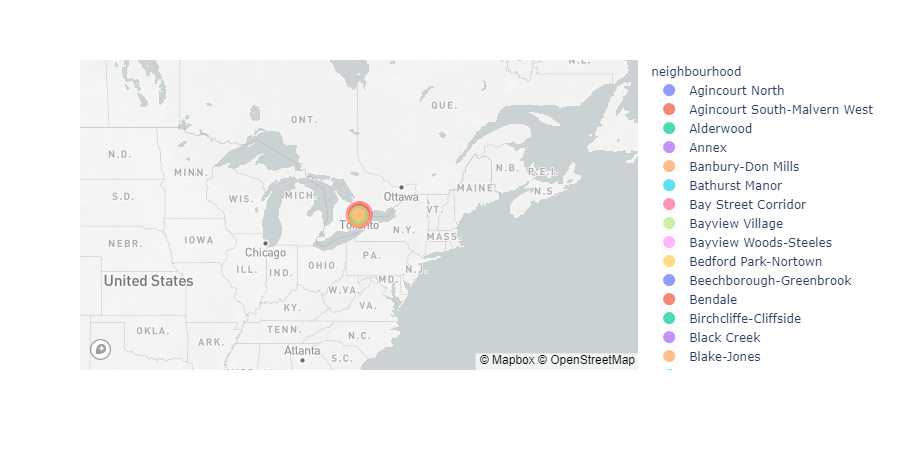

In [286]:
neighbourhood_map().show()

In [287]:

# # Bar chart for 2001
bar_2001()

# # Bar chart for 2006
bar_2006()

# # Bar chart for 2011
bar_2011()

# # Bar chart for 2016
bar_2016()

:Bars   [index]   (2016)

In [288]:
# # Line chart for owned dwellings
month_owned()
# # Line chart for rented dwellings
month_rent()

:Curve   [year]   (shelter_costs_rented)

In [289]:
average_house_val()


:Curve   [year]   (average_house_value)

In [290]:
average_value_by_neighbourhood()

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

In [291]:
number_dwelling_types()

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

In [271]:
top_most_expensive_neighbourhoods()

:Scatter   [neighbourhood]   (average_house_value)